In [1]:
# Scarichiamo un dataset di oltre 50000 cifre (da 0 a 9) scritte a mano con l'obiettivo di riconoscerle
# Porre 'one_hot=False' significa, se la prima cifra fosse ad es. 7, il numero stesso anzichè, se 'one_hot' 
# venisse posto a True, 0000000100
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

/Users/alessandrocecconi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
x_mnist = mnist.train.images
y_mnist = mnist.train.labels.astype(int)

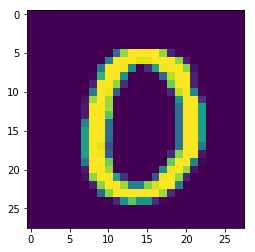

In [4]:
# per curiosità diamo un'occhiata a una singola immagine
import matplotlib.pyplot as plt
plt.imshow(x_mnist[10].reshape(28,28))

In [5]:
y_mnist[10]

0

In [6]:
x_mnist.shape

(55000, 784)

In [7]:
y_mnist.shape

(55000,)

In [8]:
# Adattiamo una DNN alle nostre immagini e vediamo se è in grado di rilevare lo schema presente nei nostri input:
import tensorflow as tf 

In [9]:
feature_cols = [tf.contrib.layers.real_valued_column("", dimension=784)]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)

In [10]:
# Costruisce una DNN con 3 livelli hidden aventi risp. 10 20 10 unità
# Addestramento della rete
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_cols,
                                           hidden_units=[10,20,10], optimizer=optimizer, n_classes=10)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c3a9a0198>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_ke

In [ ]:
# Fitting del modello
classifier.fit(x=x_mnist, y=y_mnist, steps=1000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to the Estimator interface.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please access pa

In [ ]:
# Il codice precedente è molto lento
# Test del modello
x_mnist_test = mnist.test.images
y_mnist_test = mnist.test.labels.astype(int)
x_mnist_test.shape

In [ ]:
y_mnist_test.shape

In [12]:
# Valutiamo l'accuratezza raggiunta dal modello:
accuracy_score = classifier.evaluate(x=x_mnist_test, y=y_mnist_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to the Estimator interface.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please access pa

NotFittedError: Couldn't find trained model at /var/folders/7j/zdktpkw91sbgnrs99s8lq7mw0000gn/T/tmpl3fe0nmy.

In [18]:
# Confrontiamo queste prestazioni con una Logistic Regression standard di sklearn:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_mnist, y_mnist)
# Attenzione! codice lento

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_predicted = logreg.predict(x_mnist_test)
from sklearn.metrics import accuracy_score
# previsione sul nostro set di collaudo, per evitare l'overfitting!

In [20]:
# calcola l'accuratezza
accuracy = accuracy_score(y_predicted, y_mnist_test)

In [21]:
print('Logreg Accuracy: {0:f}'.format(accuracy))

Logreg Accuracy: 0.919800


In [22]:
# Quindi la Logreg è leggermente peggiore della DNN. Ciò è probabilmente dovuto al fatto che la NN cerca di trovare
# delle relazioni tra i pixel e usa queste relazioni per creare una mappa con le cifre trascritte.
# Nella Logreg, invece, il modello presume che ogni singolo input sia indipendente dagli altri e pertanto fatica
# a trovare le relazioni tra di essi.
#
# Vi sono vari modi per far sì che la NN apprenda in modo differente, ad es. rendendola più ampia, 
# con 1 solo livello hidden con 1500 nodi:
feature_columns= [tf.contrib.layers.real_valued_column("", dimension=784)]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_cols,
                                           hidden_units=[1500], optimizer=optimizer, n_classes=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c47203ef0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/7j/zdktpkw91sbgnrs99s8lq7mw0000gn/T/tmp1jr3bhxs'}


In [ ]:
# Fittiamo il modello:
classifier.fit(x=x_mnist, y=y_mnist, steps=10)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/7j/zdktpkw91sbgnrs99s8lq7mw0000gn/T/tmp1jr3bhxs/model.ckpt.
INFO:tensorflow:loss = 2.3114526, step = 1
INFO:tensorflow:Saving checkpoints for 66 into /var/folders/7j/zdktpkw91sbgnrs99s8lq7mw0000gn/T/tmp1jr3bhxs/model.ckpt.


In [ ]:
accuracy_score = classifier.evaluate(x=x_mnist_test, y=y_mnist_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))

In [ ]:
# Potremmo incrementare la velocità di apprendimento costringendo la rete a tentare di convergere più velocemente
# su una risposta. Ma il rischio è che il modello manchi del tutto la risposta.
#
# Possiamo cambiare il metodo di ottimizzazione. Il Gradient Descent è molto utilizzato tuttavia potremmo 
# utilizzare Adam Optimizer: problemi differenti in domini differenti richiedono l'uso di ottimizzatori differenti.
#
# Nulla può sostituire una buona Feature Selection invece di lasciare alla rete il compito di studiare tutto 
# al posto nostro: impiegare più tempo alla ricerca di features più significative significa trovare più 
# velocemente una risposta.